In [1]:
import matplotlib.pyplot as plt
import nest
import sys
import numpy as np

nest.Models(mtype="all")     # Capital "M" for consistency with NEST's language SLI
# Now includes glif_psc and glif_psc_bix


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: nest-3.0
 Built: Sep 14 2022 22:43:51

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



('ac_generator',
 'aeif_cond_alpha',
 'aeif_cond_alpha_multisynapse',
 'aeif_cond_beta_multisynapse',
 'aeif_cond_exp',
 'aeif_psc_alpha',
 'aeif_psc_delta',
 'aeif_psc_delta_clopath',
 'aeif_psc_exp',
 'amat2_psc_exp',
 'bernoulli_synapse',
 'bernoulli_synapse_hpc',
 'bernoulli_synapse_lbl',
 'clopath_synapse',
 'clopath_synapse_hpc',
 'clopath_synapse_lbl',
 'cont_delay_synapse',
 'cont_delay_synapse_hpc',
 'cont_delay_synapse_lbl',
 'correlation_detector',
 'correlomatrix_detector',
 'correlospinmatrix_detector',
 'dc_generator',
 'diffusion_connection',
 'diffusion_connection_lbl',
 'erfc_neuron',
 'gamma_sup_generator',
 'gap_junction',
 'gap_junction_lbl',
 'gauss_rate_ipn',
 'gif_cond_exp',
 'gif_cond_exp_multisynapse',
 'gif_pop_psc_exp',
 'gif_psc_exp',
 'gif_psc_exp_multisynapse',
 'ginzburg_neuron',
 'glif_cond',
 'glif_psc',
 'glif_psc_bix',
 'hh_cond_beta_gap_traub',
 'hh_cond_exp_traub',
 'hh_psc_alpha',
 'hh_psc_alpha_clopath',
 'hh_psc_alpha_gap',
 'ht_neuron',
 'ht_syn

In [8]:
# Examine glif with alpha synapse
neuron=nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron, {'I_e': 380.0})  # constant current to drive periodic spiking
multimeter = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.Connect(multimeter,neuron)

tau_slow = {"tau_syn":(20.0,5.0)}     # Can adjust synaptic time constant this way
nest.SetDefaults("glif_psc", tau_slow)
neuron_post=nest.Create("glif_psc")
# Static synapse - Must run each synapse version from scratch or it seems to alter behavior by repeated Connect
syn_dict_in = {"receptor_type": 0, "weight": 2.0}
nest.Connect(neuron, neuron_post, syn_spec=syn_dict_in)

multimeter_post = nest.Create('multimeter', params={'record_from': ['V_m','I_syn']})
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t = events['times'];

plt.plot(t, events['V_m'])


NESTErrors.IncompatibleReceptorType: IncompatibleReceptorType in SLI function Connect_g_g_D_D: Receptor type 0 in glif_psc does not accept SpikeEvent.

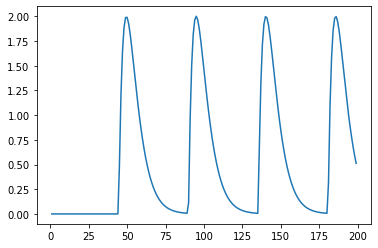

In [3]:
plt.plot(t, events['I_syn'])


Sep 21 10:44:44 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Sep 21 10:44:44 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Sep 21 10:44:44 SimulationManager::run [Info]: 
    Simulation finished.


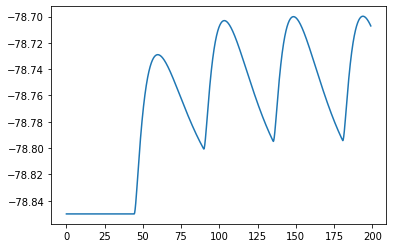

In [4]:
# Now test GLIF with bi-exponential synapse

nest.ResetKernel()

neuron=nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron, {'I_e': 380.0})  # constant current to drive periodic spiking
multimeter = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.Connect(multimeter,neuron)

neuron_post=nest.Create("glif_psc_bix")

# Can play with these time constants (receptor type 2 corresponds to the second number of each pair)
neuron_post.set({"tau_decay":(20.0,20.0),"tau_rise":(1.0,1.0),"C_m":100.0})

syn_dict_in = {"receptor_type": 2, "weight": 2.0}
nest.Connect(neuron, neuron_post, syn_spec=syn_dict_in)

# Record membrane voltage as well as total synaptic current and rising and decay components of bi-exponential
multimeter_post = nest.Create('multimeter', params={'record_from': ['V_m','I_syn','i_syn_r','i_syn_d'],'interval':0.1})
# Default sampling interval is only 1 ms which makes some sharp traces appear ragged - set interval to 0.1
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t = events['times'];

plt.plot(t, events['V_m'])

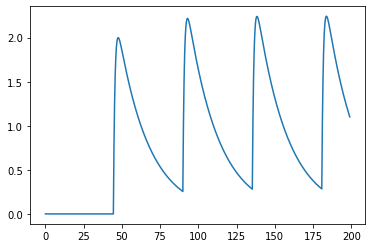

In [5]:
plt.plot(t, events['I_syn'])

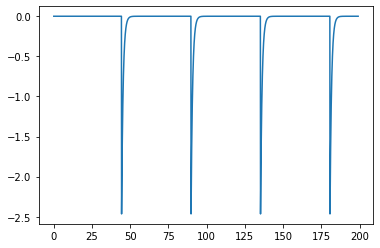

In [6]:
plt.plot(t, events['i_syn_r'])

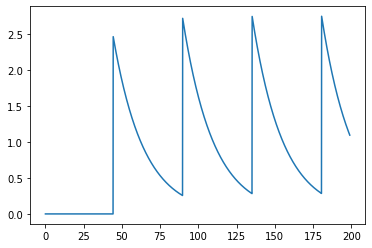

In [7]:
plt.plot(t, events['i_syn_d'])

In [8]:
# Show all recordable variables

nest.GetDefaults("glif_psc_bix")["recordables"]

('ASCurrents_sum',
 'I',
 'I_syn',
 'i_syn_r',
 'i_syn_d',
 'threshold',
 'threshold_spike',
 'threshold_voltage',
 'V_m')


Sep 21 10:47:16 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Sep 21 10:47:16 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Sep 21 10:47:16 SimulationManager::run [Info]: 
    Simulation finished.


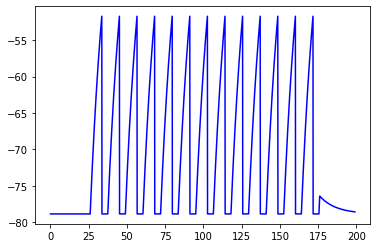

In [9]:
# Test general functionality is unaffected in response to current step

nest.ResetKernel()

step=nest.Create("dc_generator")
nest.SetStatus(step, [{"amplitude": 500.0, "start": 25.0, "stop": 175.0}])

neuron_post=nest.Create("glif_psc")

# Can play with these time constants (receptor type 2 corresponds to the second number of each pair)
neuron_post.set({"tau_syn":(5.0,5.0),"C_m":100.0})

nest.Connect(step, neuron_post, "all_to_all")

# Record membrane voltage as well as total synaptic current and rising and decay components of bi-exponential
multimeter_post = nest.Create('multimeter', params={'record_from': ['V_m'], 'interval':0.1})
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t_orig = events['times'];
v_orig = events['V_m'];

plt.plot(t, v_orig,'b')


Sep 21 10:47:47 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Sep 21 10:47:47 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Sep 21 10:47:47 SimulationManager::run [Info]: 
    Simulation finished.


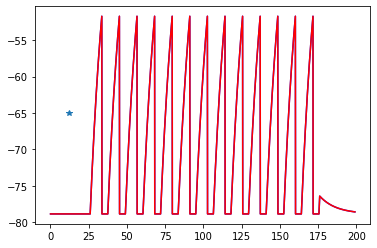

In [11]:
nest.ResetKernel()

step=nest.Create("dc_generator")
nest.SetStatus(step, [{"amplitude": 500.0, "start": 25.0, "stop": 175.0}])

neuron_post=nest.Create("glif_psc_bix")

# Can play with these time constants (receptor type 2 corresponds to the second number of each pair)
neuron_post.set({"tau_decay":(20.0,20.0),"tau_rise":(1.0,1.0),"C_m":100.0})

nest.Connect(step, neuron_post, "all_to_all")

# Record membrane voltage as well as total synaptic current and rising and decay components of bi-exponential
multimeter_post = nest.Create('multimeter', params={'record_from': ['V_m'], 'interval':0.1})
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t_bix = events['times'];
v_bix = events['V_m'];

plt.plot(t, v_orig,'b')
plt.plot(t_bix, v_bix,'r')
#plt.plot(12,-65,'*')   # Just to check all layers are showing - bix and orig model responses seem completely overlaying
plt.show()


Sep 14 22:24:48 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Sep 14 22:24:48 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Sep 14 22:24:48 SimulationManager::run [Info]: 
    Simulation finished.


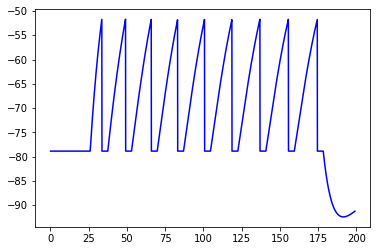

In [11]:
# Test variant GLIF models

nest.ResetKernel()

step=nest.Create("dc_generator")
nest.SetStatus(step, [{"amplitude": 500.0, "start": 25.0, "stop": 175.0}])

neuron_post=nest.Create("glif_psc")

# glif_lif_asc_psc, see glif_psc.h header and build/lib/bmtk/simulator/pointnet/glif_utils.py
neuron_post.set({"tau_syn":(5.0,5.0),"C_m":100.0, 
                 "spike_dependent_threshold": False,
                 "after_spike_currents": True,
                 "adapting_threshold": False})

nest.Connect(step, neuron_post, "all_to_all")

# Record membrane voltage as well as total synaptic current and rising and decay components of bi-exponential
multimeter_post = nest.Create('multimeter', params={'record_from': ['V_m'], 'interval':0.1})
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t_orig = events['times'];
v_orig = events['V_m'];

plt.plot(t, v_orig,'b')


Sep 12 13:56:05 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Sep 12 13:56:05 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Sep 12 13:56:05 SimulationManager::run [Info]: 
    Simulation finished.


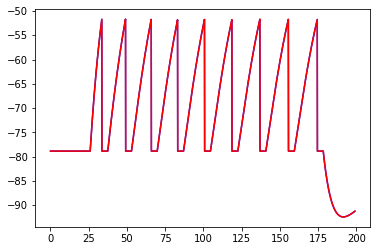

In [31]:
nest.ResetKernel()

step=nest.Create("dc_generator")
nest.SetStatus(step, [{"amplitude": 500.0, "start": 25.0, "stop": 175.0}])

neuron_post=nest.Create("glif_psc_bix")

# glif_lif_asc_psc, see glif_psc.h header and build/lib/bmtk/simulator/pointnet/glif_utils.py
neuron_post.set({"tau_decay":(20.0,20.0),"tau_rise":(1.0,1.0),"C_m":100.0, 
                 "spike_dependent_threshold": False,
                 "after_spike_currents": True,
                 "adapting_threshold": False})

nest.Connect(step, neuron_post, "all_to_all")

# Record membrane voltage as well as total synaptic current and rising and decay components of bi-exponential
multimeter_post = nest.Create('multimeter', params={'record_from': ['V_m'], 'interval':0.1})
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t_bix = events['times'];
v_bix = events['V_m'];

plt.plot(t, v_orig,'b')
plt.plot(t_bix, v_bix,'r')
#plt.plot(12,-65,'*')   # Just to check all layers are showing - bix and orig model responses seem completely overlaying
plt.show()


Sep 12 14:11:57 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Sep 12 14:11:57 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Sep 12 14:11:57 SimulationManager::run [Info]: 
    Simulation finished.


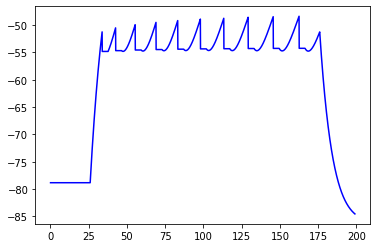

In [32]:
nest.ResetKernel()

step=nest.Create("dc_generator")
nest.SetStatus(step, [{"amplitude": 500.0, "start": 25.0, "stop": 175.0}])

neuron_post=nest.Create("glif_psc")

# glif_lif_asc_psc, see glif_psc.h header and build/lib/bmtk/simulator/pointnet/glif_utils.py
neuron_post.set({"tau_syn":(5.0,5.0),"C_m":100.0, 
                 "spike_dependent_threshold": True,
                 "after_spike_currents": True,
                 "adapting_threshold": True})

nest.Connect(step, neuron_post, "all_to_all")

# Record membrane voltage as well as total synaptic current and rising and decay components of bi-exponential
multimeter_post = nest.Create('multimeter', params={'record_from': ['V_m'], 'interval':0.1})
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t_orig = events['times'];
v_orig = events['V_m'];

plt.plot(t, v_orig,'b')


Sep 12 14:12:24 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Sep 12 14:12:24 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Sep 12 14:12:24 SimulationManager::run [Info]: 
    Simulation finished.


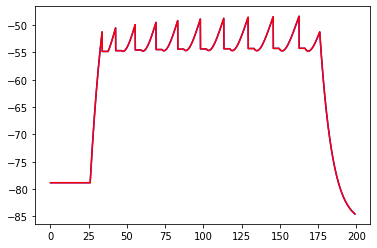

In [34]:
nest.ResetKernel()

step=nest.Create("dc_generator")
nest.SetStatus(step, [{"amplitude": 500.0, "start": 25.0, "stop": 175.0}])

neuron_post=nest.Create("glif_psc_bix")

# glif_lif_asc_psc, see glif_psc.h header and build/lib/bmtk/simulator/pointnet/glif_utils.py
neuron_post.set({"tau_decay":(20.0,20.0),"tau_rise":(1.0,1.0),"C_m":100.0, 
                 "spike_dependent_threshold": True,
                 "after_spike_currents": True,
                 "adapting_threshold": True})

nest.Connect(step, neuron_post, "all_to_all")

# Record membrane voltage as well as total synaptic current and rising and decay components of bi-exponential
multimeter_post = nest.Create('multimeter', params={'record_from': ['V_m'], 'interval':0.1})
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t_bix = events['times'];
v_bix = events['V_m'];

plt.plot(t, v_orig,'b')
plt.plot(t_bix, v_bix,'r')
#plt.plot(12,-65,'*')   # Just to check all layers are showing - bix and orig model responses seem completely overlaying
plt.show()

Tau membrane: 6.226935312831389

Sep 12 15:54:10 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Sep 12 15:54:10 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Sep 12 15:54:10 SimulationManager::run [Info]: 
    Simulation finished.


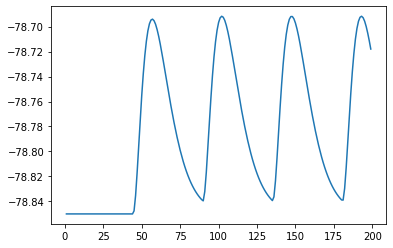

In [46]:
###### default_c = 58.72  # pF
default_g = 9.43   # nS
default_tau = default_c / default_g 
print("Tau membrane:", default_tau)

# special condition triggered if abs(tau_syn - tau)<0.1  (propagator_stability.cpp)

nest.ResetKernel()

# Examine glif with alpha synapse
neuron=nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron, {'I_e': 380.0})  # constant current to drive periodic spiking
multimeter = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.Connect(multimeter,neuron)

tau_slow = {"tau_syn":(6.22,6.22)}     # Can adjust synaptic time constant this way
nest.SetDefaults("glif_psc", tau_slow)
neuron_post=nest.Create("glif_psc")
# Static synapse - Must run each synapse version from scratch or it seems to alter behavior by repeated Connect
syn_dict_in = {"receptor_type": 2, "weight": 2.0}
nest.Connect(neuron, neuron_post, syn_spec=syn_dict_in)

multimeter_post = nest.Create('multimeter', params={'record_from': ['V_m','I_syn']})
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t = events['times'];

plt.plot(t, events['V_m'])



Sep 12 16:07:08 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Sep 12 16:07:08 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Sep 12 16:07:08 SimulationManager::run [Info]: 
    Simulation finished.


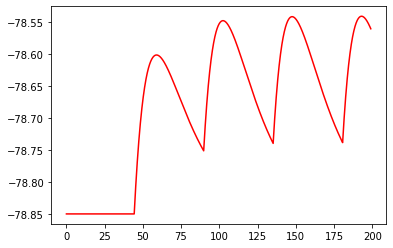

In [50]:
nest.ResetKernel()

neuron=nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron, {'I_e': 380.0})  # constant current to drive periodic spiking
multimeter = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.Connect(multimeter,neuron)

neuron_post=nest.Create("glif_psc_bix")

# Can play with these time constants (receptor type 2 corresponds to the second number of each pair)
neuron_post.set({"tau_decay":(20.0,20.0),"tau_rise":(6.22,6.22),"C_m":100.0})
#neuron_post.set({"tau_decay":(6.22,6.22),"tau_rise":(1.0,1.0),"C_m":100.0})
#neuron_post.set({"tau_decay":(6.26,6.26),"tau_rise":(6.21,6.21),"C_m":100.0})

syn_dict_in = {"receptor_type": 2, "weight": 2.0}
nest.Connect(neuron, neuron_post, syn_spec=syn_dict_in)

# Record membrane voltage as well as total synaptic current and rising and decay components of bi-exponential
multimeter_post = nest.Create('multimeter', params={'record_from': ['V_m','I_syn','i_syn_r','i_syn_d'],'interval':0.1})
# Default sampling interval is only 1 ms which makes some sharp traces appear ragged - set interval to 0.1
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t = events['times'];

plt.plot(t, events['V_m'], 'r')

In [5]:
# Does this work in BMTK?
# Basic network

from bmtk.builder.networks import NetworkBuilder
from bmtk.simulator import pointnet
from bmtk.analyzer.compartment import plot_traces
from bmtk.analyzer.spike_trains import plot_raster

net = NetworkBuilder('two_cell')

# Build Nodes

net.add_nodes(
    N=1,
    model_type='point_neuron',
    model_template= 'nest:iaf_psc_alpha',
    dynamics_params='472363762_point_with_cc.json',
    ei_type='e',
    pop_name='presyn'
)

net.add_nodes(
    N=1,
    model_type='point_neuron',
    model_template= 'nest:glif_lif_asc_psc_bix',
    dynamics_params='Scnn1a_515806250_glif_lif_asc.json',
    ei_type='e',
    pop_name='postsyn'
)

net.add_edges(
    source=net.nodes(pop_name='presyn'),
    target=net.nodes(pop_name='postsyn'),
    connection_rule = 1,
    model_template='static_synapse',
    dynamics_params='static_ExcToExc.json',     
    delay=2.0,
    syn_weight=-100
)

net.build()
net.save(output_dir='network')


In [6]:
from bmtk.utils.create_environment import create_environment

create_environment(
    'pointnet',
    base_dir='.',
    config_file='config.pointnet.json',
    network_dir='network',
    output_dir='output_pointnet',
    tstop=3000.0, dt=0.1,
#    current_clamp= {
#        'amp': 0.150,                  # Current size (pA)
#        'delay': 500,                  # Time from start of simulation to onset of step (ms)
#        'duration': 2000               # Duration of current step (ms)
#    },
    report_vars=['V_m'],                 # Record membrane potential
#    report_vars=[('l4', 'V_m')],
    run_script='run_pointnet.py',
    overwrite=True,
)


In [7]:
from bmtk.simulator import pointnet

configure = pointnet.Config.from_json('config.pointnet.json')
configure.build_env()

network = pointnet.PointNetwork.from_config(configure)
sim = pointnet.PointSimulator.from_config(configure, network)
sim.run()

2022-09-14 23:08:07,582 [INFO] Created log file


INFO:NestIOUtils:Created log file


2022-09-14 23:08:07,596 [INFO] Batch processing nodes for two_cell/0.


INFO:NestIOUtils:Batch processing nodes for two_cell/0.


2022-09-14 23:08:07,606 [INFO] Setting up output directory


INFO:NestIOUtils:Setting up output directory


2022-09-14 23:08:07,608 [INFO] Building cells.


INFO:NestIOUtils:Building cells.


2022-09-14 23:08:07,613 [INFO] Building recurrent connections


INFO:NestIOUtils:Building recurrent connections


2022-09-14 23:08:07,618 [INFO] Network created.


INFO:NestIOUtils:Network created.


2022-09-14 23:08:07,623 [INFO] Starting Simulation


INFO:NestIOUtils:Starting Simulation


2022-09-14 23:08:07,762 [INFO] Simulation finished, finalizing results.


INFO:NestIOUtils:Simulation finished, finalizing results.


2022-09-14 23:08:07,801 [INFO] Done.


INFO:NestIOUtils:Done.


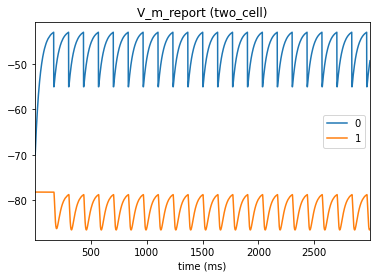

In [8]:
_ = plot_traces(config_file='config.pointnet.json', report_name='V_m_report', node_ids = [0, 1])


Sep 22 11:14:03 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Sep 22 11:14:03 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Sep 22 11:14:03 SimulationManager::run [Info]: 
    Simulation finished.


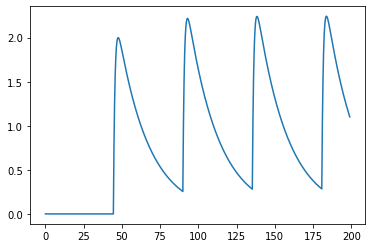

In [24]:
# Compare GLIF with bi-exponential synapse and iaf_psc_exp with double connected synapse

nest.ResetKernel()

neuron=nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron, {'I_e': 380.0})  # constant current to drive periodic spiking
multimeter = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.Connect(multimeter,neuron)

neuron_post=nest.Create("glif_psc_bix")

# Can play with these time constants (receptor type 2 corresponds to the second number of each pair)
neuron_post.set({"tau_decay":(20.0,20.0),"tau_rise":(1.0,1.0),"C_m":100.0})

syn_dict_in = {"receptor_type": 2, "weight": 2.0}
nest.Connect(neuron, neuron_post, syn_spec=syn_dict_in)

# Record membrane voltage as well as total synaptic current and rising and decay components of bi-exponential
multimeter_post = nest.Create('multimeter', params={'record_from': ['I_syn'],'interval':0.1})
# Default sampling interval is only 1 ms which makes some sharp traces appear ragged - set interval to 0.1
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t = events['times'];

plt.plot(t, events['I_syn'])
I_syn_glif_bix = events['I_syn']


Sep 22 11:14:47 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Sep 22 11:14:47 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Sep 22 11:14:47 SimulationManager::run [Info]: 
    Simulation finished.


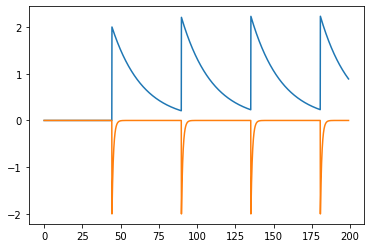

In [26]:
# Compare GLIF with bi-exponential synapse and iaf_psc_exp with double connected synapse

nest.ResetKernel()

neuron=nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron, {'I_e': 380.0})  # constant current to drive periodic spiking
multimeter = nest.Create('multimeter', params={'record_from': ['V_m']})
nest.Connect(multimeter,neuron)

neuron_post=nest.Create("iaf_psc_exp")

# Can play with these time constants (receptor type 2 corresponds to the second number of each pair)
neuron_post.set({"tau_syn_ex":20.0, "tau_syn_in":1.0, "C_m":100.0})

syn_dict_1 = {"receptor_type": 0, "weight": -2.0}
syn_dict_2 = {"receptor_type": 0, "weight": 2.0}
nest.Connect(neuron, neuron_post, syn_spec=syn_dict_1)
nest.Connect(neuron, neuron_post, syn_spec=syn_dict_2)

# Record membrane voltage as well as total synaptic current and rising and decay components of bi-exponential
multimeter_post = nest.Create('multimeter', params={'record_from': ['I_syn_ex','I_syn_in'],'interval':0.1})
# Default sampling interval is only 1 ms which makes some sharp traces appear ragged - set interval to 0.1
nest.Connect(multimeter_post,neuron_post)

nest.Simulate(200.0)

events = nest.GetStatus(multimeter_post)[0]['events']    # Nest 3 returns objects and uses set() and get()
t = events['times'];

plt.plot(t, events['I_syn_ex'])
plt.plot(t, events['I_syn_in'])

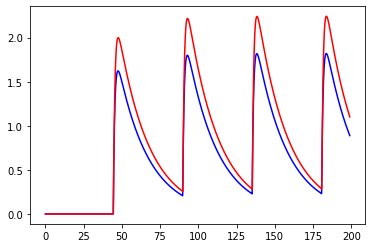

In [27]:
plt.plot(t, events['I_syn_ex']+events['I_syn_in'], 'b')
plt.plot(t, I_syn_glif_bix, 'r')
plt.show()

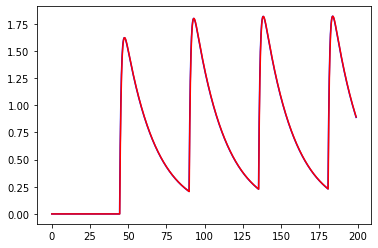

In [29]:
scale = np.max(I_syn_glif_bix)/np.max(events['I_syn_ex']+events['I_syn_in'])
plt.plot(t, events['I_syn_ex']+events['I_syn_in'], 'b')
plt.plot(t, I_syn_glif_bix/scale, 'r')
plt.show()